<a href="https://colab.research.google.com/github/maxim371/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Maxwell_Kwarteng_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

In [8]:
from google.colab import files
uploaded = files.upload()

Saving haberman.data to haberman.data


In [121]:
import pandas as pd
survival = pd.read_csv("haberman.data")
print(survival)

     30  64   1  1.1
0    30  62   3    1
1    30  65   0    1
2    31  59   2    1
3    31  65   4    1
4    33  58  10    1
5    33  60   0    1
6    34  59   0    2
7    34  66   9    2
8    34  58  30    1
9    34  60   1    1
10   34  61  10    1
11   34  67   7    1
12   34  60   0    1
13   35  64  13    1
14   35  63   0    1
15   36  60   1    1
16   36  69   0    1
17   37  60   0    1
18   37  63   0    1
19   37  58   0    1
20   37  59   6    1
21   37  60  15    1
22   37  63   0    1
23   38  69  21    2
24   38  59   2    1
25   38  60   0    1
26   38  60   0    1
27   38  62   3    1
28   38  64   1    1
29   38  66   0    1
..   ..  ..  ..  ...
275  67  66   0    1
276  67  61   0    1
277  67  65   0    1
278  68  67   0    1
279  68  68   0    1
280  69  67   8    2
281  69  60   0    1
282  69  65   0    1
283  69  66   0    1
284  70  58   0    2
285  70  58   4    2
286  70  66  14    1
287  70  67   0    1
288  70  68   0    1
289  70  59   8    1
290  70  63  

In [122]:
survival.isnull().sum()

30     0
64     0
1      0
1.1    0
dtype: int64

In [123]:
survival.shape

(305, 4)

In [145]:
col_headers = ['Age','Year','Axillary_Nodes','Survival_Status']

survival = pd.read_csv("haberman.data", names=col_headers)
survival.head()

,Age,Year,Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [125]:
import numpy as np
survival['Survival_Status'] = np.where(survival['Survival_Status'] <= 1, '1',
                           np.where(survival['Survival_Status'] >= 2, '0',
                           np.where(survival['Survival_Status'] == -1, 'none', 'Died')))
survival.head(5)

,Age,Year,Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# TODO
#Sorry code is above

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [126]:
survival.describe()

,Age,Year,Axillary_Nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [146]:
survival['Age1'] = np.where(survival['Age'] >= 52, 'True',
                           np.where(survival['Age'] < 52, 'False ',
                           np.where(survival['Age'] == -1, 'none', 'Not')))
survival.head(10)

,Age,Year,Axillary_Nodes,Survival_Status,Age1
0,30,64,1,1,False
1,30,62,3,1,False
2,30,65,0,1,False
3,31,59,2,1,False
4,31,65,4,1,False
5,33,58,10,1,False
6,33,60,0,1,False
7,34,59,0,2,False
8,34,66,9,2,False
9,34,58,30,1,False


In [147]:
survival['Axillary_Nodes1'] = np.where(survival['Axillary_Nodes'] >= 4, 'True',
                           np.where(survival['Axillary_Nodes'] < 4, 'False ',
                           np.where(survival['Axillary_Nodes'] == -1, 'none', 'Not')))
survival.head(10)

,Age,Year,Axillary_Nodes,Survival_Status,Age1,Axillary_Nodes1
0,30,64,1,1,False,False
1,30,62,3,1,False,False
2,30,65,0,1,False,False
3,31,59,2,1,False,False
4,31,65,4,1,False,True
5,33,58,10,1,False,True
6,33,60,0,1,False,False
7,34,59,0,2,False,False
8,34,66,9,2,False,True
9,34,58,30,1,False,True


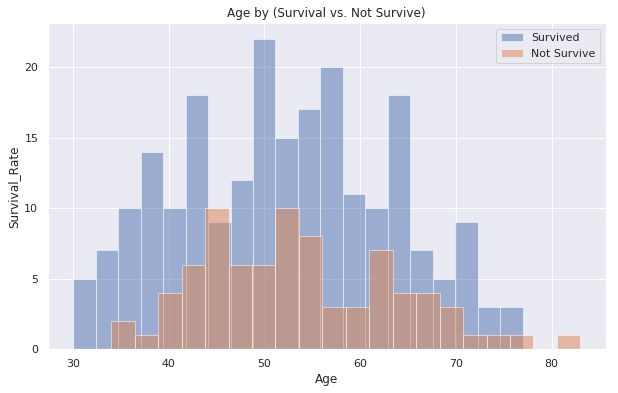

In [149]:
import matplotlib.pyplot as plt

survival.groupby('Survival_Status').Age.hist(bins=20, alpha=0.5, figsize=(10,6));
plt.title('Age by (Survival vs. Not Survive)');
plt.ylabel('Survival_Rate')
plt.xlabel('Age')
plt.legend(['Survived','Not Survive']);

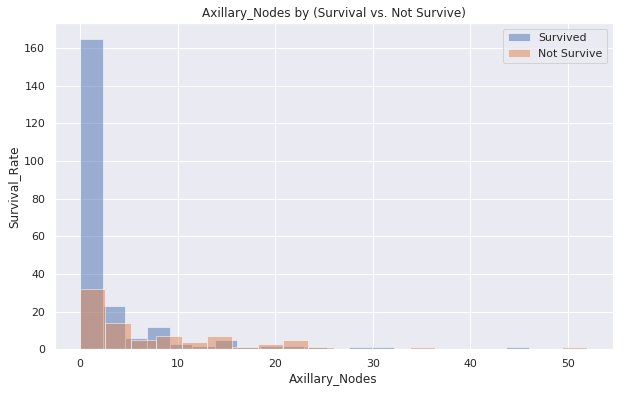

In [150]:
import matplotlib.pyplot as plt

survival.groupby('Survival_Status').Axillary_Nodes.hist(bins=20, alpha=0.5, figsize=(10,6));
plt.title('Axillary_Nodes by (Survival vs. Not Survive)');
plt.ylabel('Survival_Rate')
plt.xlabel('Axillary_Nodes')
plt.legend(['Survived','Not Survive']);

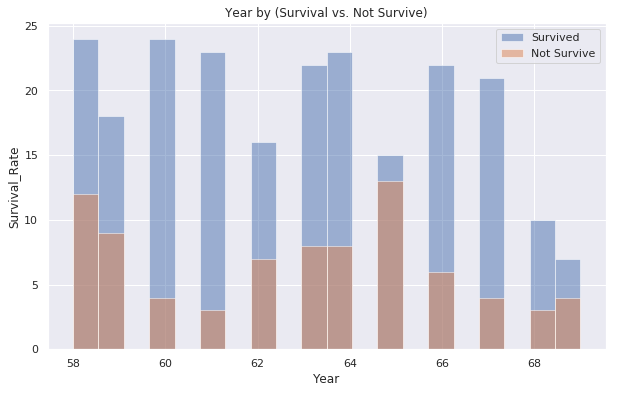

In [151]:
import matplotlib.pyplot as plt

survival.groupby('Survival_Status').Year.hist(bins=20, alpha=0.5, figsize=(10,6));
plt.title('Year by (Survival vs. Not Survive)');
plt.ylabel('Survival_Rate')
plt.xlabel('Year')
plt.legend(['Survived','Not Survive']);

In [130]:
Year_bins = pd.cut(survival['Year'], 5)  # 5 equal-sized bins
pd.crosstab(Year_bins, survival['Axillary_Nodes'], normalize='columns')

Axillary_Nodes,False,True
Year,,
"(57.989, 60.2]",0.313364,0.258427
"(60.2, 62.4]",0.152074,0.179775
"(62.4, 64.6]",0.198157,0.202247
"(64.6, 66.8]",0.170507,0.213483
"(66.8, 69.0]",0.165899,0.146067


In [131]:
pd.crosstab(columns=survival['Survival_Status'], index=Year_bins, normalize='index')

Survival_Status,0,1
Year,,
"(57.989, 60.2]",0.274725,0.725275
"(60.2, 62.4]",0.204082,0.795918
"(62.4, 64.6]",0.262295,0.737705
"(64.6, 66.8]",0.339286,0.660714
"(66.8, 69.0]",0.224490,0.775510


In [132]:
pd.crosstab(Age_bins, survival['Survival_Status'], normalize='columns')

Survival_Status,0,1
Age,,
"(29.947, 40.6]",0.049383,0.173333
"(40.6, 51.2]",0.382716,0.302222
"(51.2, 61.8]",0.333333,0.306667
"(61.8, 72.4]",0.197531,0.191111
"(72.4, 83.0]",0.037037,0.026667


In [133]:
pd.crosstab(survival['Age'], survival['Survival_Status'], normalize='columns')


Survival_Status,0,1
Age,,
False,0.432099,0.475556
True,0.567901,0.524444


In [138]:
pd.crosstab(survival['Axillary_Nodes'], survival['Survival_Status'], normalize='columns')


Survival_Status,0,1
Axillary_Nodes,,
False,0.481481,0.791111
True,0.518519,0.208889


In [139]:
pd.crosstab(Year_bins, survival['Survival_Status'], normalize='columns')


Survival_Status,0,1
Year,,
"(57.989, 60.2]",0.308642,0.293333
"(60.2, 62.4]",0.123457,0.173333
"(62.4, 64.6]",0.197531,0.200000
"(64.6, 66.8]",0.234568,0.164444
"(66.8, 69.0]",0.135802,0.168889


In [141]:
pd.crosstab(survival['Age'], survival['Axillary_Nodes'], normalize='columns')


Axillary_Nodes,False,True
Age,,
False,0.451613,0.494382
True,0.548387,0.505618


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

One feature with a positive relationship with survival is Axillary Nodes. The Lower the Nodes, the higher chance of survival.

One feature with a negative relationship with survival is Age. From the data, it looks like the older one gets, the more likely they will not survive after 5 years. Survival Rates start to decline after 50 years

The two features show that the older patients have lower Axillary Nodes. Older patients with lower Axillary Nodes have high survival rates

